# LA Dock Load Project

## Overview

The Port of Los Angeles is the busiest shipping port in the United States. Staffing and resource allocation for such a major trade hub is crucial to maintaining logistic integrity for US importation and exportation. In pursuit of informing planners of such logistics, our goal is to analyze port traffic data over time to create a model for predicting daily traffic. This will allow for the optimization of both staff and maintenance scheduling at the port.

This data was collected directly from the Port of Los Angeles website and comprises approximately 4 years worth of unstructured data (PDF format).

In [1]:
# Initial imports
import wrangle as w
import explore as e
import model as m

# Wrangle

* Acquired data from Port of LA Website
* Data was in PDF format and required conversion through the tabula library to csv format
* Converted date column to datetime and set this to index
* Created new columns for year, month, day of the month, weekday name, and weekday number separately from datetime index
* Created backlog column by subtracting average days at berth column from average days at anchor and berth column

In [2]:
# Read in the data from the Port of Los Angeles website and perform preparation functions
df = w.wrangle_pola()

In [3]:
df.head()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,weekday,day_num,backlog
date,,,,,,,,,,,
2015-05-01,0.0,12.0,5.0,5.8,5.8,2015,5,1,Friday,4,0.0
2015-05-04,0.0,7.0,4.0,3.0,4.5,2015,5,4,Monday,0,1.5
2015-05-05,1.0,7.0,4.0,1.5,1.5,2015,5,5,Tuesday,1,0.0
2015-05-06,1.0,10.0,2.0,1.5,1.5,2015,5,6,Wednesday,2,0.0
2015-05-07,1.0,13.0,2.0,2.0,2.0,2015,5,7,Thursday,3,0.0


# Explore

In [4]:
# split data into 70/15/15 train/validate/test split in terms of number of days, train dataset being earliest in time
train, val, test = w.split_pola(df)

### What is the distribution of number of ships at berth?

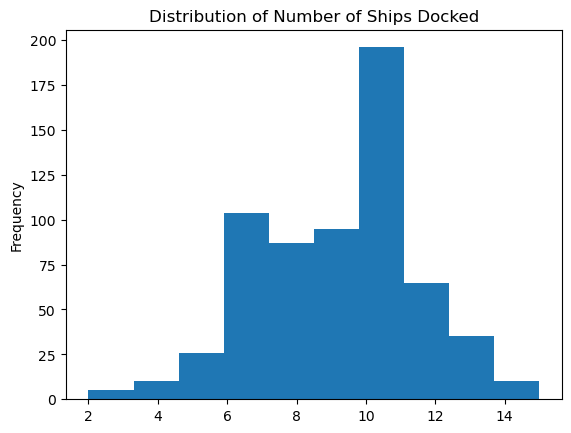

In [5]:
# Display a histogram of how often different counts of ships appear at berth
e.num_ships_docked(train)

10 is the modal average for number of ships at berth. Per the port of LA, there are 7 dedicated container terminals and 25 total terminals in the port. Also per the website, the vast majority of ships are container ships, with 1 or 2 other types of ships per day as well (passenger, bulk, liquid, etc.) 

### What is the weekly breakdown of port traffic?

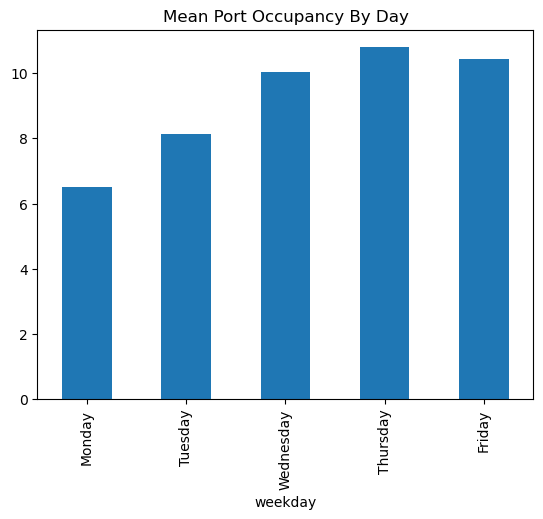

In [6]:
# Display a bar chart showing the average number of ships at berth on each day of the week
e.daily_port_occupancy(train)

Port traffic seems to follow a fairly regular weekly pattern. The port is closed on weekends and holidays. Traffic tends to build, reaching a maximum at the end of the week. It's important to note that models should likely be better than roughly 4 ships in RMSE to perform better than a simple, weekly predictive average model. 

# Model

* Modeling required adding 0 values for weekends and holidays to account for days missing form the dataset

#### the best performing baseline model was a moving average of 21 days, RMSE was 2.83

In [7]:
# Impute weekend index values with zeros on the weekend
train, val, test = m.preprocess(train, val, test)

num_at_berth -- RMSE: 2.83


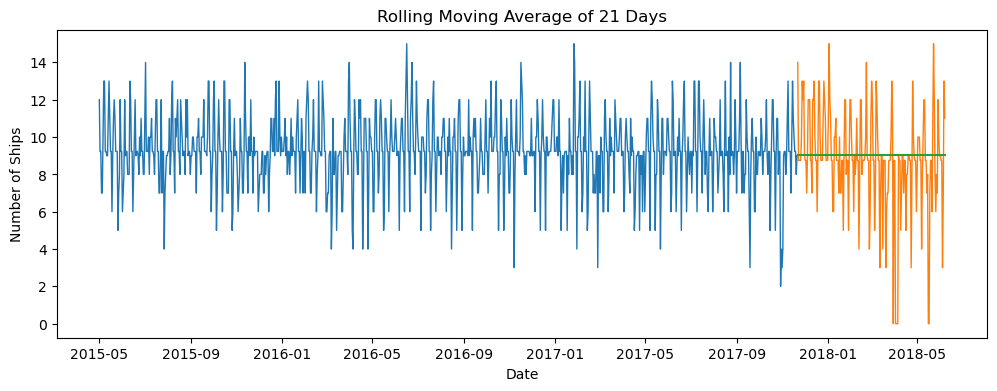

In [8]:
# Build a baseline model with a rolling average of 21 days and evaluate the RMSE
m.build_baseline_model(train, val)

#### We used a Holt's Linear model with hyperparemeters set to non-exponential smoothing and no dampening, RMSE was 5.21, in excess of our baseline RMSE of 2.82

num_at_berth -- RMSE: 2.82


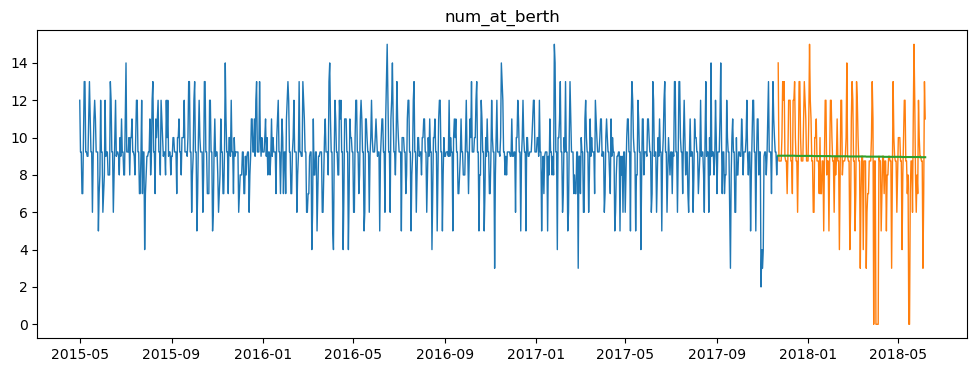

In [9]:
# Build a Holt's Linear Model with exponential and damped set to 'False' then evaluate the RMSE
m.build_holt_linear_model(train, val)

#### We then evaluated model performance on the training set

num_at_berth -- RMSE: 2.43


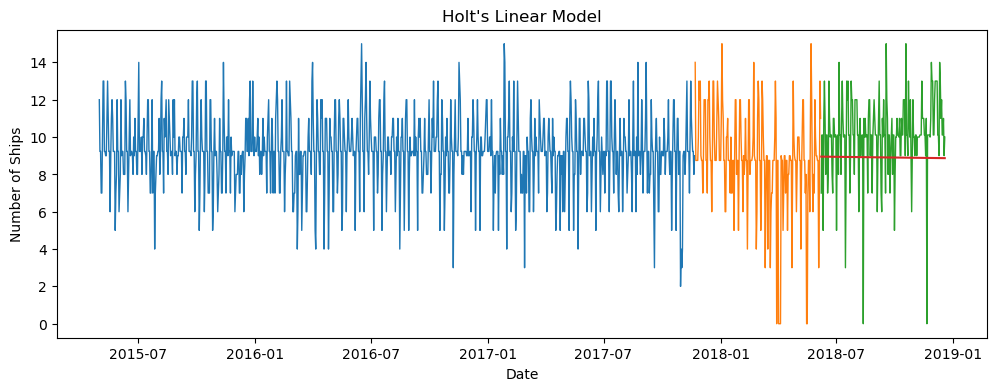

In [10]:
# Evaluate the same Holt's Linear Model on the test dataframe and evaluate the RMSE
m.test_holt_linear(train, val, test)

# Conclusions

Exploration indicated that port traffic follows a fairly regular weekly schedule. The modal average number of ships in port was 10. This number was the average for Wednesday through Friday. Consequently, port staffing and material allocation should maximize efforts on the latter portion of the week. The port should also plan for at least 10 ships for high traffic days, including 1 or 2 non-container vessels. 

Modeling with Holt's Linear Model produced an RMSE below baseline, with RMSE values of 2.83 for baseline and 2.43 on the test set. 

# Next Steps

- Attempt utilizing Facebook Prophet time series analysis model as this model accounts for missing days, including regional holidays. 

- Gather additional data from the Port of LA on ship types

- Collect data on when shipping companies "slow steam" to save money on repairs and fuel

- Obtain point of origin weather data from most common trade partner ports to see if this affects LA port traffic